### 例 2.1
### 利用犯罪嫌疑人的足长和步幅预测其身高。利用给定的足长、步幅和身高数据集，以足长、步幅为自变量，身高为因变量，采用二元线性回归获得预测身高的模型，对应的Python 代码如下:

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
import warnings

warnings.filterwarnings('ignore')

In [58]:
#读取数据
df = pd.read_excel("./身高预测参照表-1.xlsx")
print(df.head())

     足长  步幅          身高
0  21.0  60  157.266284
1  21.0  61  157.873103
2  21.0  62  158.389684
3  21.0  63  157.980905
4  21.0  64  159.769893


In [59]:
df.columns = ['足长', '步幅', '身高']

In [60]:
print(df.head())

     足长  步幅          身高
0  21.0  60  157.266284
1  21.0  61  157.873103
2  21.0  62  158.389684
3  21.0  63  157.980905
4  21.0  64  159.769893


In [61]:
# 获取拆分后的数据x_data,y_data(其中x_data为数据集，y_data为标签）
def get_data(data):
    x_data = data.drop(columns=['身高'], axis=1)
    y_data = data['身高']
    return x_data, y_data

In [62]:
x_data, y_data = get_data(df)
from sklearn.linear_model import LinearRegression

# 训练模型
lr = LinearRegression()
lr.fit(x_data, y_data)
y_pred = lr.predict(x_data)

print("权重：", lr.coef_)
print("截距：", lr.intercept_)
print(lr.score(x_data, y_data))

权重： [3.17219931 0.3273639 ]
截距： 70.6111433169842
0.9830735216391343


In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用Axes3D库画3D模型图

In [64]:
x1_data = x_data.drop(columns=['步幅'], axis=1)
x2_data = x_data.drop(columns=['足长'], axis=1)

In [65]:
print(x1_data)

        足长
0     21.0
1     21.0
2     21.0
3     21.0
4     21.0
...    ...
2695  28.4
2696  28.4
2697  28.4
2698  28.4
2699  28.4

[2700 rows x 1 columns]


In [66]:
print(x2_data)

      步幅
0     60
1     61
2     62
3     63
4     64
...   ..
2695  91
2696  92
2697  93
2698  94
2699  95

[2700 rows x 1 columns]


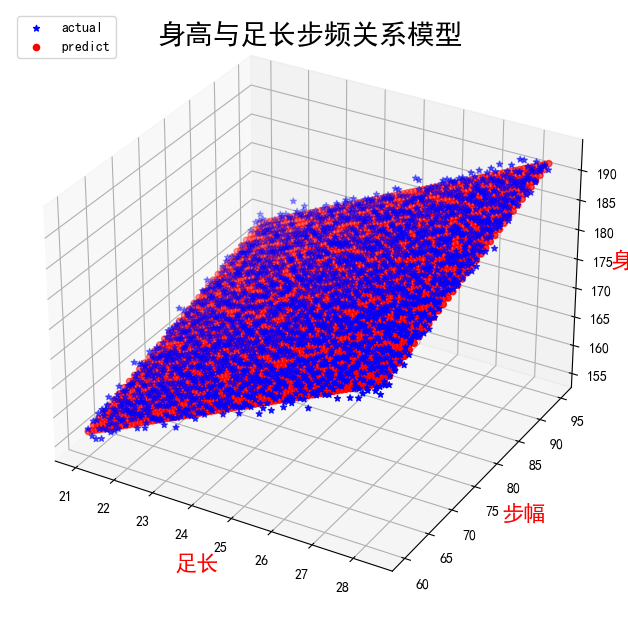

In [67]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体

fig = plt.figure(figsize=(8,6))  # 设置画布大小
ax3d = Axes3D(fig)
fig.add_axes(ax3d)

ax3d.scatter(x1_data,x2_data,y_data,color='b',marker='*',label='actual')  # 绘制实际
ax3d.scatter(x1_data,x2_data,y_pred,color='r',label='predict')
ax3d.set_xlabel('足长',color='r',fontsize=16)  # 设置x轴标签
ax3d.set_ylabel('步幅',color='r',fontsize=16)  # 设置y轴标签
ax3d.set_zlabel('身高',color='r',fontsize=16)  # 设置z轴标签

plt.suptitle("身高与足长步频关系模型",fontsize=20)  # 设置标题
plt.legend(loc='upper left')

plt.show()

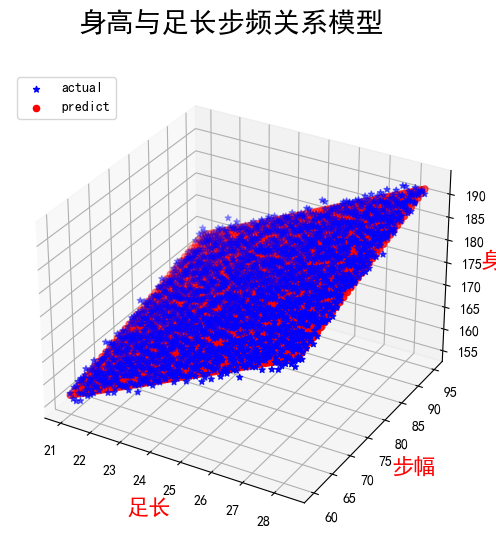

In [68]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体

fig = plt.figure(figsize=(8,6))  # 设置画布大小
ax3d = fig.add_subplot(111, projection='3d')

ax3d.scatter(x1_data,x2_data,y_data,color='b',marker='*',label='actual')  # 绘制实际
ax3d.scatter(x1_data,x2_data,y_pred,color='r',label='predict')
ax3d.set_xlabel('足长',color='r',fontsize=16)  # 设置x轴标签
ax3d.set_ylabel('步幅',color='r',fontsize=16)  # 设置y轴标签
ax3d.set_zlabel('身高',color='r',fontsize=16)  # 设置z轴标签

plt.suptitle("身高与足长步频关系模型",fontsize=20)  # 设置标题
plt.legend(loc='upper left')

plt.show()

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     足长  步幅          身高
0  21.0  60  157.266284
1  21.0  61  157.873103
2  21.0  62  158.389684
3  21.0  63  157.980905
4  21.0  64  159.769893
权重： [3.17219931 0.3273639 ]
截距： 70.6111433169842
R²得分： 0.9830735216391343


AttributeError: 'tuple' object has no attribute 'size'

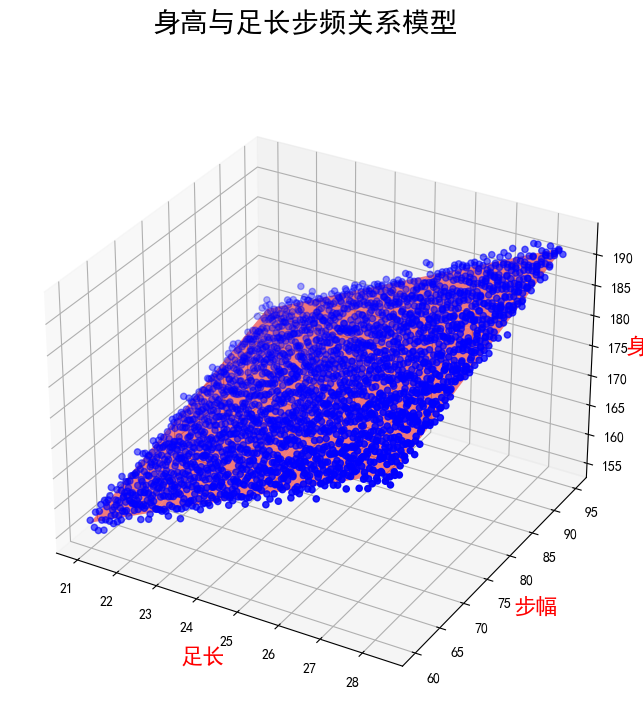

In [70]:
# 安装 openpyxl 库
!pip install openpyxl

# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# 读取数据
df = pd.read_excel("身高预测参照表-1.xlsx", engine="openpyxl")
print(df.head())  # 检查数据是否成功加载

# 获取数据
x_data = df.drop(columns=['身高'], axis=1)
y_data = df['身高']

# 确保数据形状一致
x1_data = x_data['足长'].values.flatten()
x2_data = x_data['步幅'].values.flatten()
y_data = y_data.values.flatten()

# 训练模型
lr = LinearRegression()
lr.fit(x_data, y_data)
y_pred = lr.predict(x_data)

# 打印模型参数
print("权重：", lr.coef_)
print("截距：", lr.intercept_)
print("R²得分：", lr.score(x_data, y_data))

# 绘制3D图
fig = plt.figure(figsize=(10, 8))
ax3d = fig.add_subplot(111, projection='3d')

# 散点图
ax3d.scatter(x1_data, x2_data, y_data, c='b', marker='o', label='实际值')

# 拟合平面
xx, yy = np.meshgrid(np.linspace(x1_data.min(), x1_data.max(), 10),
                     np.linspace(x2_data.min(), x2_data.max(), 10))
zz = lr.coef_[0] * xx + lr.coef_[1] * yy + lr.intercept_
ax3d.plot_surface(xx, yy, zz, color='r', alpha=0.5, label='预测值')

# 设置轴标签
ax3d.set_xlabel('足长', color='r', fontsize=16)
ax3d.set_ylabel('步幅', color='r', fontsize=16)
ax3d.set_zlabel('身高', color='r', fontsize=16)

# 设置标题和图例
plt.suptitle("身高与足长步频关系模型", fontsize=20)
plt.legend(loc='upper left')

# 显示图形
plt.show()